In [ ]:
from rdflib import Graph, Namespace, RDFS

EX = Namespace("http://example.org/ar/")

g = Graph().parse("ar_graph1.ttl", format="turtle")


In [ ]:
q1 = """
PREFIX ex: <http://example.org/ar/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?name WHERE {
  ?c a ex:Category ;
     rdfs:label ?name .
}
ORDER BY ?name
"""

print("Все категории:")
for row in g.query(q1):
    print( row.name)


Все категории:
 • bird
 • book
 • cat
 • clock
 • dog


In [ ]:
q2 = """
PREFIX ex: <http://example.org/ar/>
PREFIX cat: <http://example.org/ar/Category/>

SELECT DISTINCT ?file WHERE {
  ?ann a ex:Annotation ;
       ex:hasCategory cat:book ;
       ex:onImage ?img .
  ?img ex:fileName ?file .
}
ORDER BY ?file
"""

print("Изображения с книгами:")
for row in g.query(q2):
    print( row.file)

Изображения с книгами:
 • 000000026564.jpg
 • 000000037740.jpg
 • 000000134882.jpg


In [30]:
q3 = """
PREFIX ex: <http://example.org/ar/>
PREFIX cat: <http://example.org/ar/Category/>

SELECT ?node ?prompt WHERE {
  ?node a ex:StoryNode ;
        ex:targets cat:cat ;
        ex:prompt ?prompt .
}
ORDER BY ?node
"""

print("Истории, связанные с категорией cat")
for row in g.query(q3):
    print(f"{row.node.split('/')[-1]}: {row.prompt}")

Истории, связанные с категорией cat
3: Под деревом кто-то скрывается в тени. Наведите, чтобы выяснить, кто это.


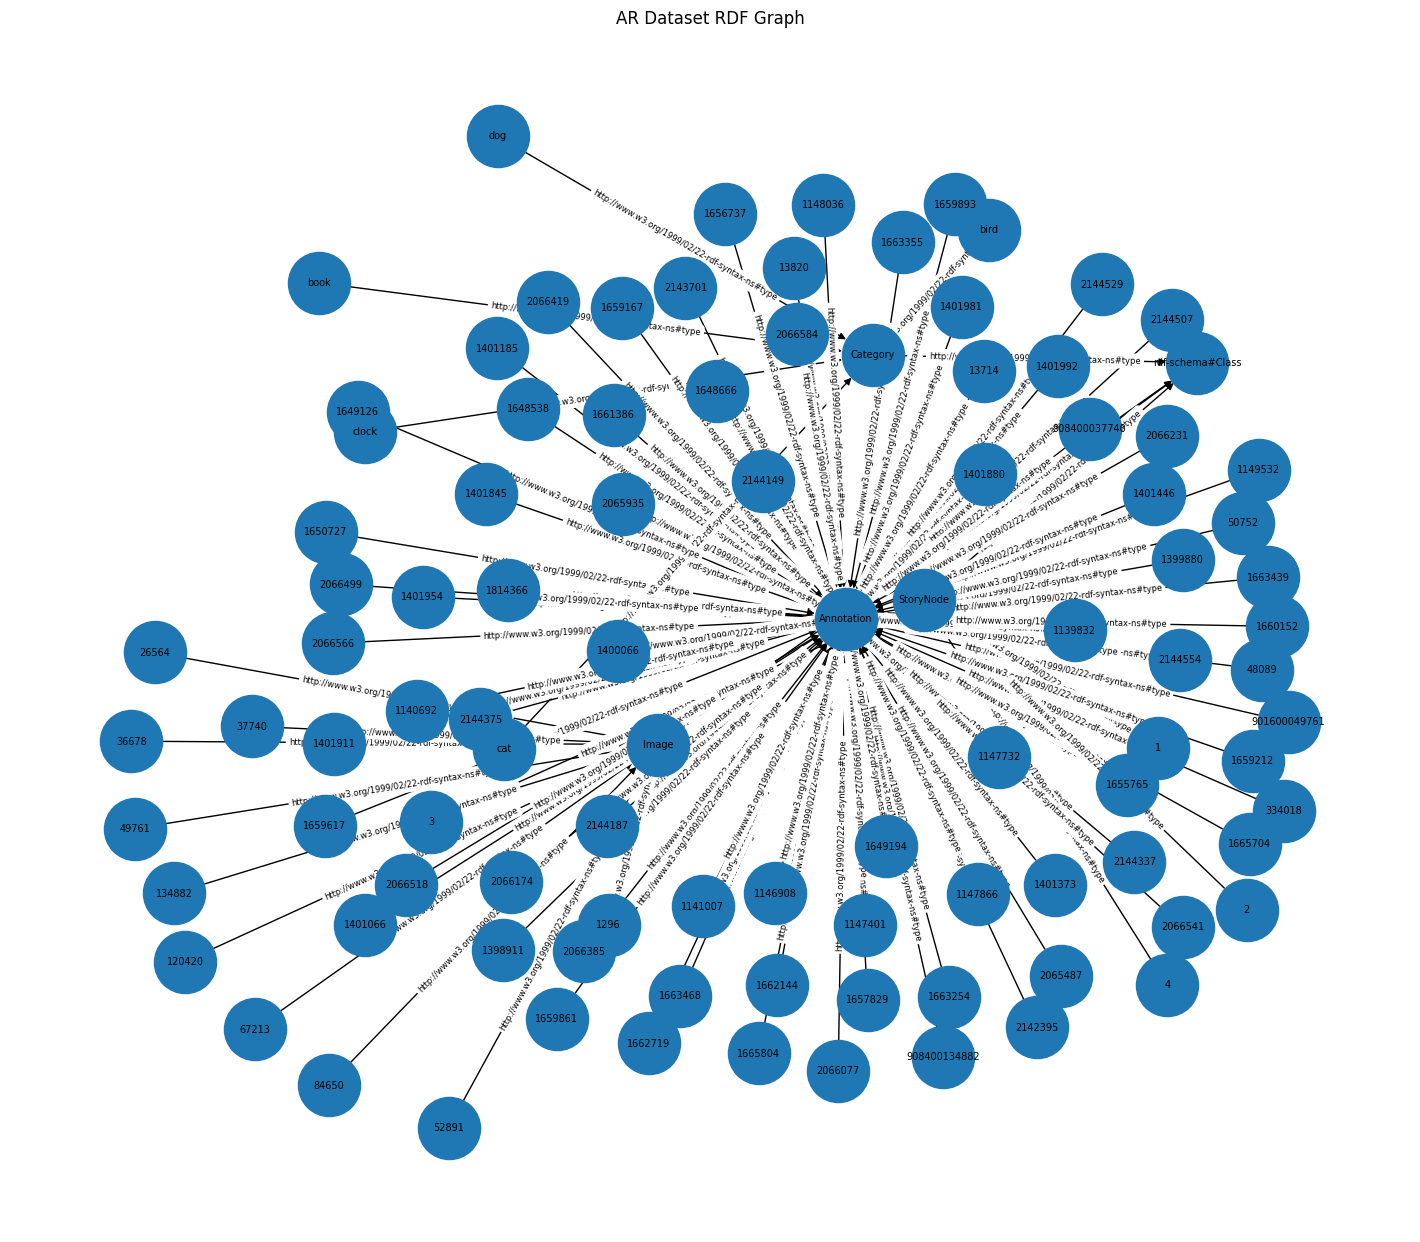

In [ ]:
from rdflib import Graph
import networkx as nx
import matplotlib.pyplot as plt

g = Graph()
g.parse("ar_graph1.ttl", format="turtle")
def short(uri): return uri.split('/')[-1]

G = nx.DiGraph()
for s, p, o in g:
    if (s, RDF.type, RDFS.Class) in g or (o, RDF.type, RDFS.Class) in g:
        G.add_edge(short(str(s)), short(str(o)), label=str(p))


plt.figure(figsize=(14, 12))
pos = nx.spring_layout(G, k=0.5)

nx.draw(G, pos, with_labels=True, node_size=2000, font_size=7, arrows=True)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6)
plt.title("RDF")
plt.show()
